In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score
from sklearn.metrics import roc_auc_score, f1_score, log_loss, classification_report, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
import time
import warnings
warnings.filterwarnings("ignore")

# Загрузка данных

In [2]:
df = pd.read_excel('данные.xlsx')
df.head()

,Личное дело.Номер,Номер заявления,Сумма баллов,Сумма баллов по предметам,Приказ,Согласие на зачисление,Приоритет,Пол,Дата рождения,Место рождения,...,Состояние,Дата согласия на зачисление,Доставка документов,Кафедра,Параметры.Приемная кампания,Проходная сумма баллов (с ИД),Средний балл за 1 предмет с ИД,Конкурс человек на место,За счет средств федерального бюджета,По договорам об оказании платных образовательных услуг . всего мест
0,71325,215298,232,227,NaN,Да,2,Женский,2004-11-02,г. Александров Владимирская область,...,Подано,2022-07-18 15:44:12,Веб,NaN,Приемная кампания 000000199 от 11.04.2022 16:1...,295.0,98.333333,68.600000,44,256
1,71325,215298,232,227,NaN,Да,1,Женский,2004-11-02,г. Александров Владимирская область,...,Подано,2022-07-18 15:44:12,Веб,NaN,Приемная кампания 000000199 от 11.04.2022 16:1...,272.0,90.666667,7.212766,85,165
2,71325,215298,232,227,NaN,Да,3,Женский,2004-11-02,г. Александров Владимирская область,...,Подано,2022-07-18 15:44:12,Веб,NaN,Приемная кампания 000000199 от 11.04.2022 16:1...,270.0,90.000000,7.636364,20,55
3,65820,280076,232,226,NaN,Да,1,Женский,2003-12-10,ГОР. СОЛИКАМСК ПЕРМСКОЙ ОБЛ.,...,Подано,2022-07-25 23:59:59,Веб,NaN,Приемная кампания 000000199 от 11.04.2022 16:1...,279.0,93.000000,7.625000,85,190
4,65820,280076,232,226,NaN,Да,7,Женский,2003-12-10,ГОР. СОЛИКАМСК ПЕРМСКОЙ ОБЛ.,...,Подано,2022-07-25 23:59:59,Веб,NaN,Приемная кампания 000000199 от 11.04.2022 16:1...,243.0,81.000000,4.023810,100,100


# Первоначальный анализ данных

In [313]:
df.shape

(17517, 52)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17517 entries, 0 to 17516
Data columns (total 52 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Личное дело.Номер                                                    17517 non-null  int64         
 1   Номер заявления                                                      17517 non-null  int64         
 2   Сумма баллов                                                         17517 non-null  int64         
 3   Сумма баллов по предметам                                            17517 non-null  int64         
 4   Приказ                                                               2162 non-null   object        
 5   Согласие на зачисление                                               17517 non-null  object        
 6   Приоритет                                     

In [315]:
df.duplicated().sum()

0

In [316]:
df.isna().sum() 

Личное дело.Номер                                                          0
Номер заявления                                                            0
Сумма баллов                                                               0
Сумма баллов по предметам                                                  0
Приказ                                                                 15355
Согласие на зачисление                                                     0
Приоритет                                                                  0
Пол                                                                        0
Дата рождения                                                              0
Место рождения                                                             0
Гражданство                                                                0
Иностранные языки                                                          0
Нуждаемость в общежитии                                                    0

In [3]:
df = df.drop(['Личное дело.Номер', 'Номер заявления', 'Пол', 'Дата рождения','Тип вступительных испытаний (по физлицу)',
              'Кафедра', 'Дата выдачи', 'Адрес по прописке', 'Регион по прописке', 'Населенный пункт по прописке', 
              'Житель села','Образовательное учреждение', 'Дата согласия на зачисление', 
              'Состояние договора', 'Дата заявления'], axis = 1)

In [318]:
df.isna().sum() 

Сумма баллов                                                               0
Сумма баллов по предметам                                                  0
Приказ                                                                 15355
Согласие на зачисление                                                     0
Приоритет                                                                  0
Место рождения                                                             0
Гражданство                                                                0
Иностранные языки                                                          0
Нуждаемость в общежитии                                                    0
Основание поступления                                                      0
Категория приема                                                           0
Источник финансирования                                                    0
Уровень подготовки                                                         0

In [4]:
values = {"Приказ": 'Нет', "Место рождения": 'Не указано',  "Гражданство": 'Не указано', "Иностранные языки": 'Не указано',
         "Профиль": 'Не указано', "Особое право": 'Не указано', "Преимущественное право": 'Не указано', 
          "Олимпиада без вступительных.Наименование": 'Не указано', "Страна по прописке": 'Не указано', 
          "Город по прописке": 'Не указано',"Проходная сумма баллов (с ИД)": 0, "Средний балл за 1 предмет с ИД": 0,
          "Конкурс человек на место": 0}
df = df.fillna(value=values)

In [320]:
df.isna().sum() 

Сумма баллов                                                           0
Сумма баллов по предметам                                              0
Приказ                                                                 0
Согласие на зачисление                                                 0
Приоритет                                                              0
Место рождения                                                         0
Гражданство                                                            0
Иностранные языки                                                      0
Нуждаемость в общежитии                                                0
Основание поступления                                                  0
Категория приема                                                       0
Источник финансирования                                                0
Уровень подготовки                                                     0
Направление\специальность                          

In [5]:
from sklearn.preprocessing import OrdinalEncoder#кодировка категориальных признаков
ordinal_encoder = OrdinalEncoder()
object_cols=['Приказ','Состояние','Согласие на зачисление','Место рождения', 'Гражданство', 'Иностранные языки', 
             'Нуждаемость в общежитии', 'Основание поступления', 'Категория приема',
             'Источник финансирования', 'Уровень подготовки', 'Направление\специальность', 'Профиль', 'Подразделение', 
            'Особое право', 'Преимущественное право', 'Без вступительных испытаний', 'Целевик', 'Особые права',
             'Олимпиада без вступительных.Наименование', 'Страна по прописке',  'Город по прописке', 
             'Вид образования','Тип документа об образовании', 'Оригинал', 'Оплачено', 'Доставка документов', 
             'Параметры.Приемная кампания']
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])   

In [322]:
df

,Сумма баллов,Сумма баллов по предметам,Приказ,Согласие на зачисление,Приоритет,Место рождения,Гражданство,Иностранные языки,Нуждаемость в общежитии,Основание поступления,...,Год завершения,Оплачено,Состояние,Доставка документов,Параметры.Приемная кампания,Проходная сумма баллов (с ИД),Средний балл за 1 предмет с ИД,Конкурс человек на место,За счет средств федерального бюджета,По договорам об оказании платных образовательных услуг . всего мест
0,232,227,0.0,0.0,2,1726.0,6.0,0.0,0.0,0.0,...,2022,1.0,2.0,0.0,1.0,295.0,98.333333,68.600000,44,256
1,232,227,0.0,0.0,1,1726.0,6.0,0.0,0.0,0.0,...,2022,1.0,2.0,0.0,1.0,272.0,90.666667,7.212766,85,165
2,232,227,0.0,0.0,3,1726.0,6.0,0.0,0.0,0.0,...,2022,1.0,2.0,0.0,1.0,270.0,90.000000,7.636364,20,55
3,232,226,0.0,0.0,1,664.0,6.0,0.0,1.0,0.0,...,2022,1.0,2.0,0.0,1.0,279.0,93.000000,7.625000,85,190
4,232,226,0.0,0.0,7,664.0,6.0,0.0,1.0,0.0,...,2022,1.0,2.0,0.0,1.0,243.0,81.000000,4.023810,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17512,252,247,0.0,1.0,4,3105.0,6.0,0.0,1.0,0.0,...,2021,1.0,1.0,0.0,0.0,276.0,92.000000,19.181818,58,142
17513,251,246,0.0,1.0,7,3105.0,6.0,0.0,0.0,0.0,...,2021,1.0,1.0,0.0,0.0,279.0,93.000000,91.000000,10,90
17514,188,188,0.0,1.0,4,2321.0,6.0,0.0,1.0,1.0,...,2021,1.0,2.0,0.0,0.0,0.0,0.000000,0.000000,50,175
17515,188,188,0.0,1.0,6,2321.0,6.0,0.0,1.0,1.0,...,2021,1.0,2.0,0.0,0.0,0.0,0.000000,0.000000,25,50


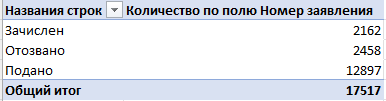

In [323]:
(df['Состояние'] == 1).sum()#отозвано-цел переменная

2458

In [324]:
(df['Состояние'] == 0).sum()#зачислен

2162

In [325]:
(df['Состояние'] == 2).sum()#подано

12897

In [326]:
df.describe()

,Сумма баллов,Сумма баллов по предметам,Приказ,Согласие на зачисление,Приоритет,Место рождения,Гражданство,Иностранные языки,Нуждаемость в общежитии,Основание поступления,...,Год завершения,Оплачено,Состояние,Доставка документов,Параметры.Приемная кампания,Проходная сумма баллов (с ИД),Средний балл за 1 предмет с ИД,Конкурс человек на место,За счет средств федерального бюджета,По договорам об оказании платных образовательных услуг . всего мест
count,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,...,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000
mean,244.251470,240.886682,17.611806,0.738311,4.452589,1637.226808,5.998516,0.063881,0.380773,0.332877,...,2021.426728,0.926928,1.612833,0.090484,0.508477,188.150083,62.716694,19.136657,70.396586,134.523777
std,47.805323,46.787960,55.048007,0.439567,3.434025,880.130466,0.144544,0.451680,0.485591,0.495123,...,0.677637,0.260262,0.695803,0.507738,0.499942,126.598525,42.199508,62.282756,51.363508,85.332191
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,230.000000,229.000000,0.000000,0.000000,2.000000,847.000000,6.000000,0.000000,0.000000,0.000000,...,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,55.000000
50%,257.000000,254.000000,0.000000,1.000000,3.000000,1748.000000,6.000000,0.000000,0.000000,0.000000,...,2021.000000,1.000000,2.000000,0.000000,1.000000,269.000000,89.666667,6.529412,60.000000,100.000000
75%,273.000000,268.000000,0.000000,1.000000,6.000000,2398.000000,6.000000,0.000000,1.000000,1.000000,...,2022.000000,1.000000,2.000000,0.000000,1.000000,276.000000,92.000000,14.197183,100.000000,225.000000
max,306.000000,300.000000,304.000000,1.000000,15.000000,3120.000000,8.000000,4.000000,1.000000,2.000000,...,2022.000000,1.000000,2.000000,3.000000,1.000000,300.000000,100.000000,529.000000,175.000000,300.000000


In [6]:
print('Общее количество отозванных заявлений =',(df['Состояние'] == 1).sum())
print('Процентное соотношение оттока =',round((df['Состояние'] == 1).sum()/len(df)*100,3),'%')

Общее количество отозванных заявлений = 2458
Процентное соотношение оттока = 14.032 %


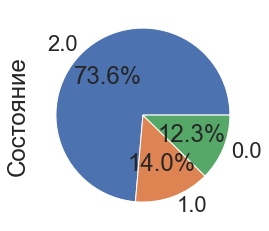

In [337]:
df['Состояние'].value_counts().plot.pie(autopct = '%1.1f%%');

<AxesSubplot:>

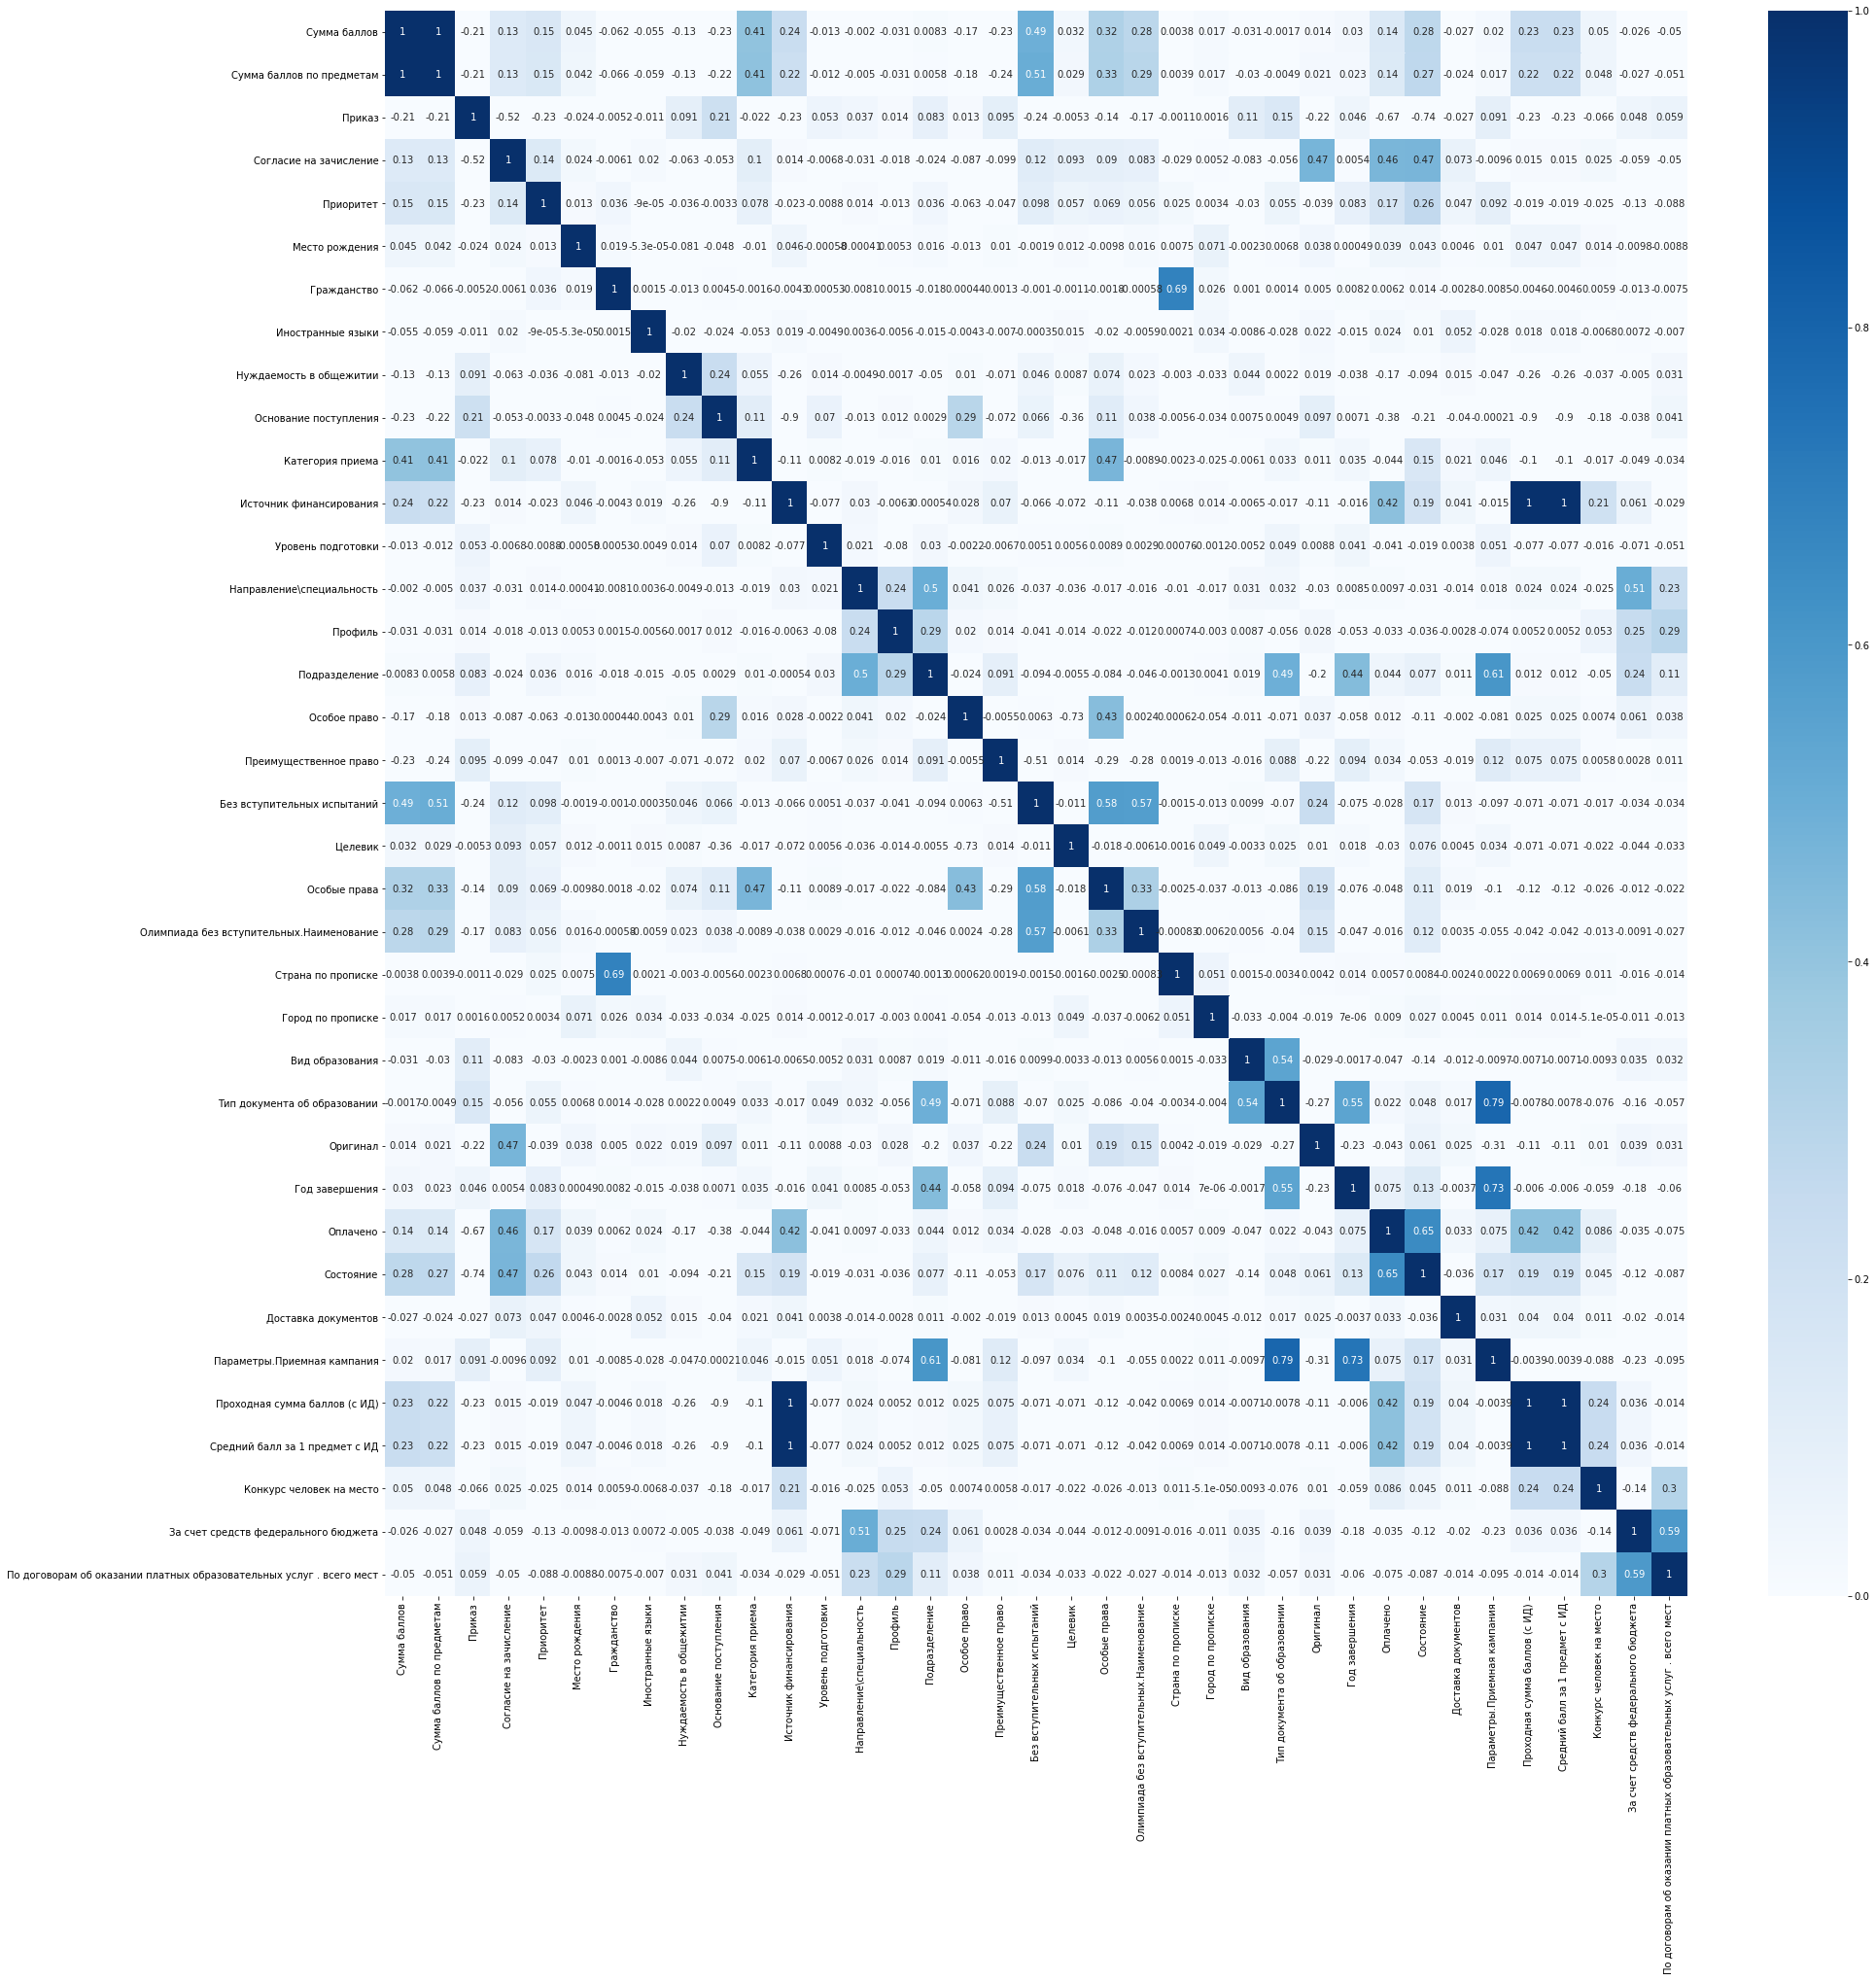

In [7]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), vmin=0, vmax=1, cmap = 'Blues', annot = True)

In [14]:
df1 = df

In [15]:
df1 = df1.drop(['Приказ','Место рождения', 'Гражданство', 'Иностранные языки', 'Нуждаемость в общежитии',
                'Направление\специальность','Профиль', 'Подразделение', 'Страна по прописке',  'Город по прописке', 
                'Параметры.Приемная кампания', 'Уровень подготовки', 'Сумма баллов по предметам', 'Год завершения', 
                'Тип документа об образовании', 'Источник финансирования','Целевик','Особые права', 
                'Доставка документов', 'Средний балл за 1 предмет с ИД', 'Оригинал', 'Преимущественное право','Основание поступления'], axis = 1)

<AxesSubplot:>

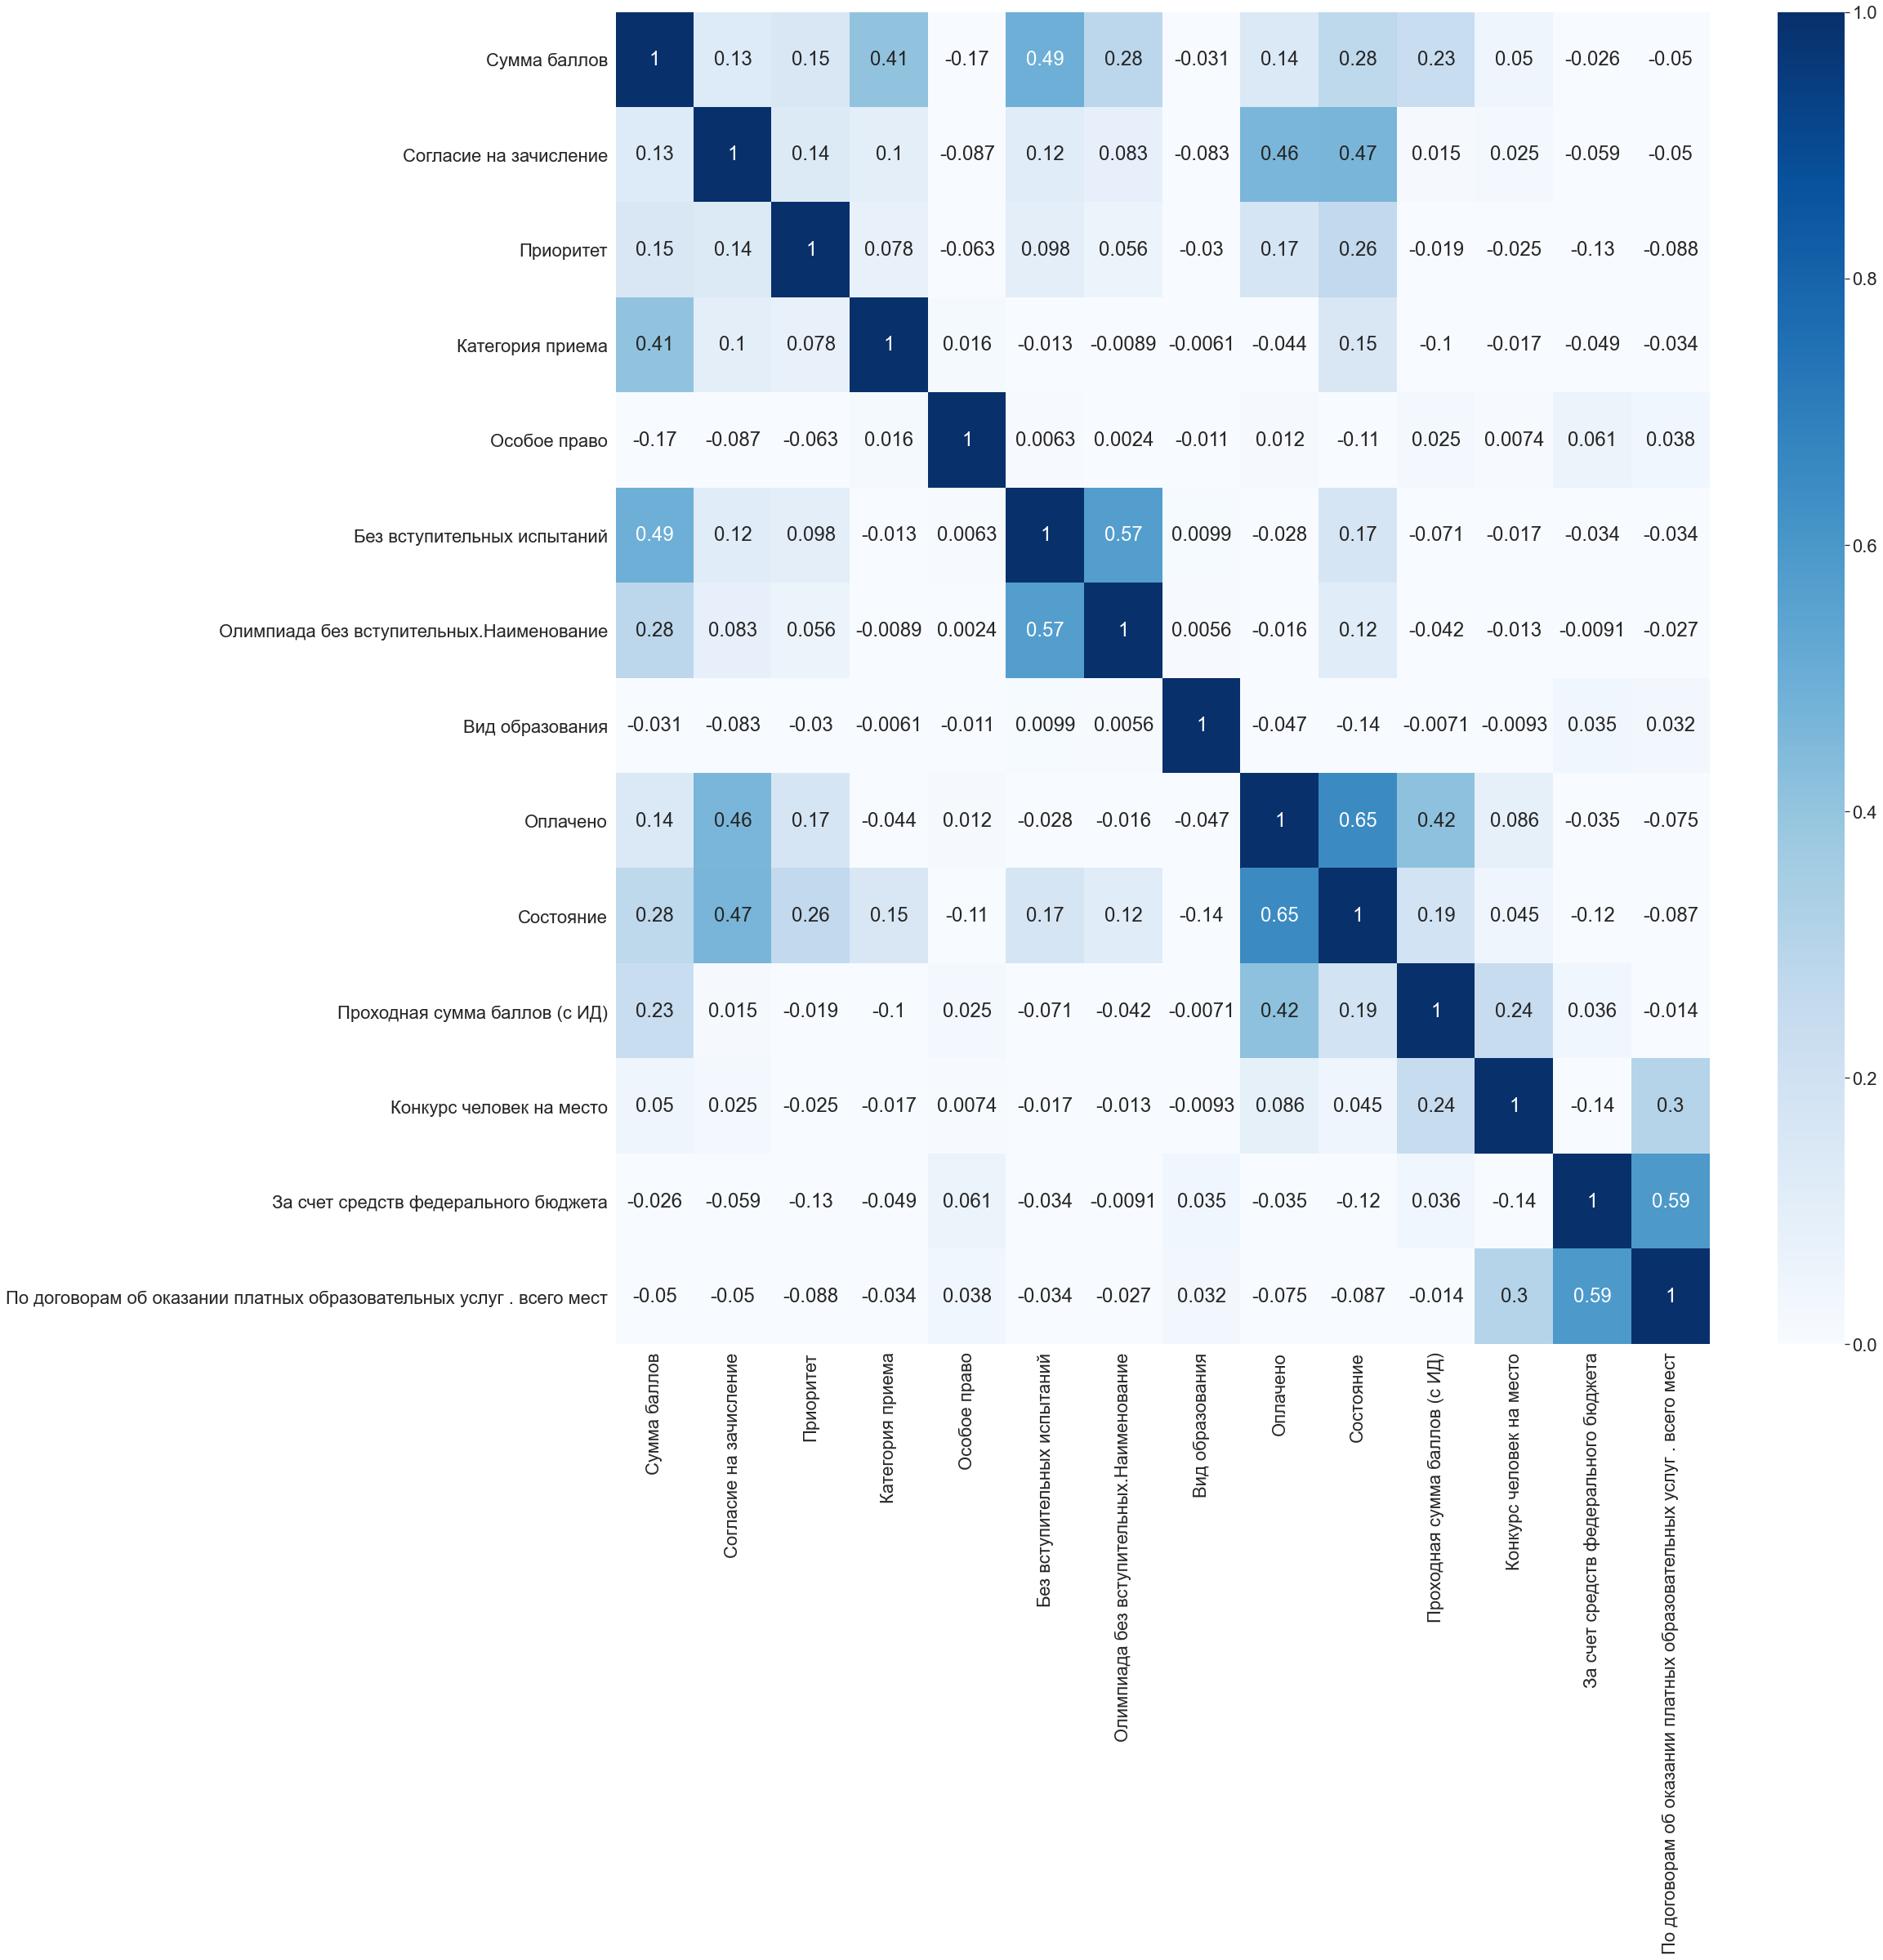

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(), vmin=0, vmax=1, cmap = 'Blues', annot = True)

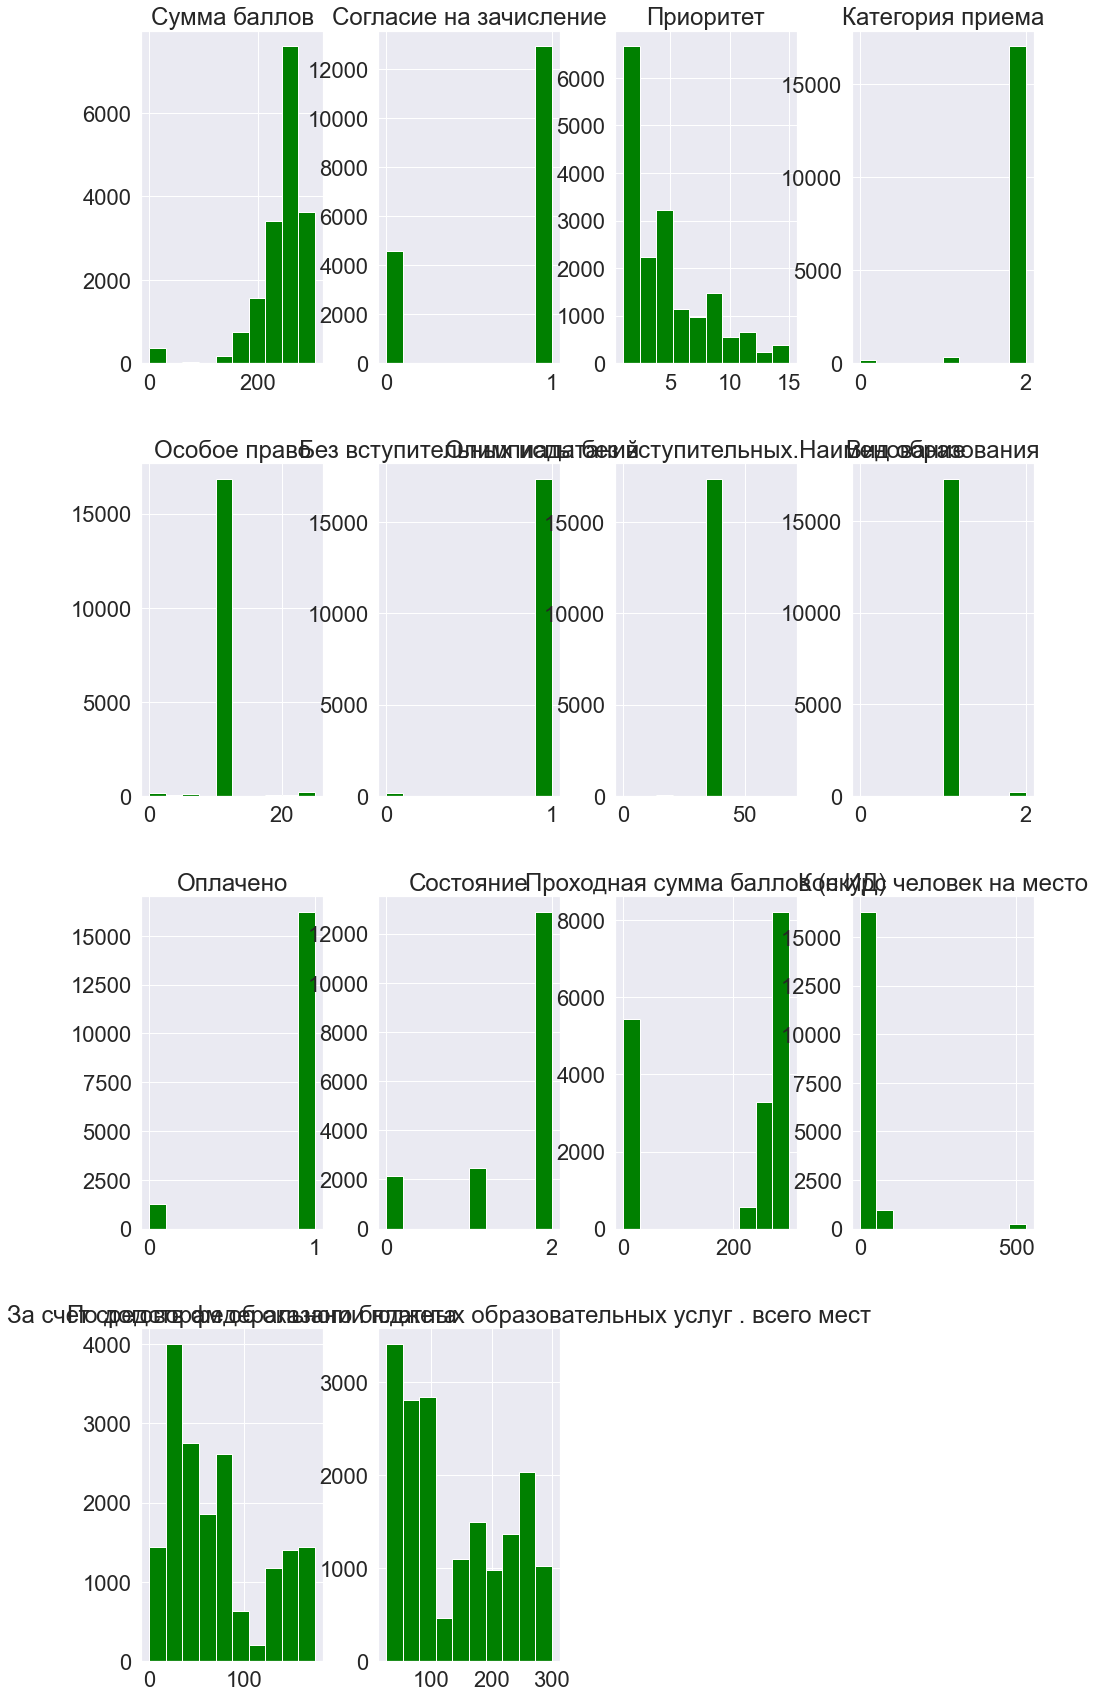

In [17]:
df1.hist(figsize= (16, 30), color = 'Green');

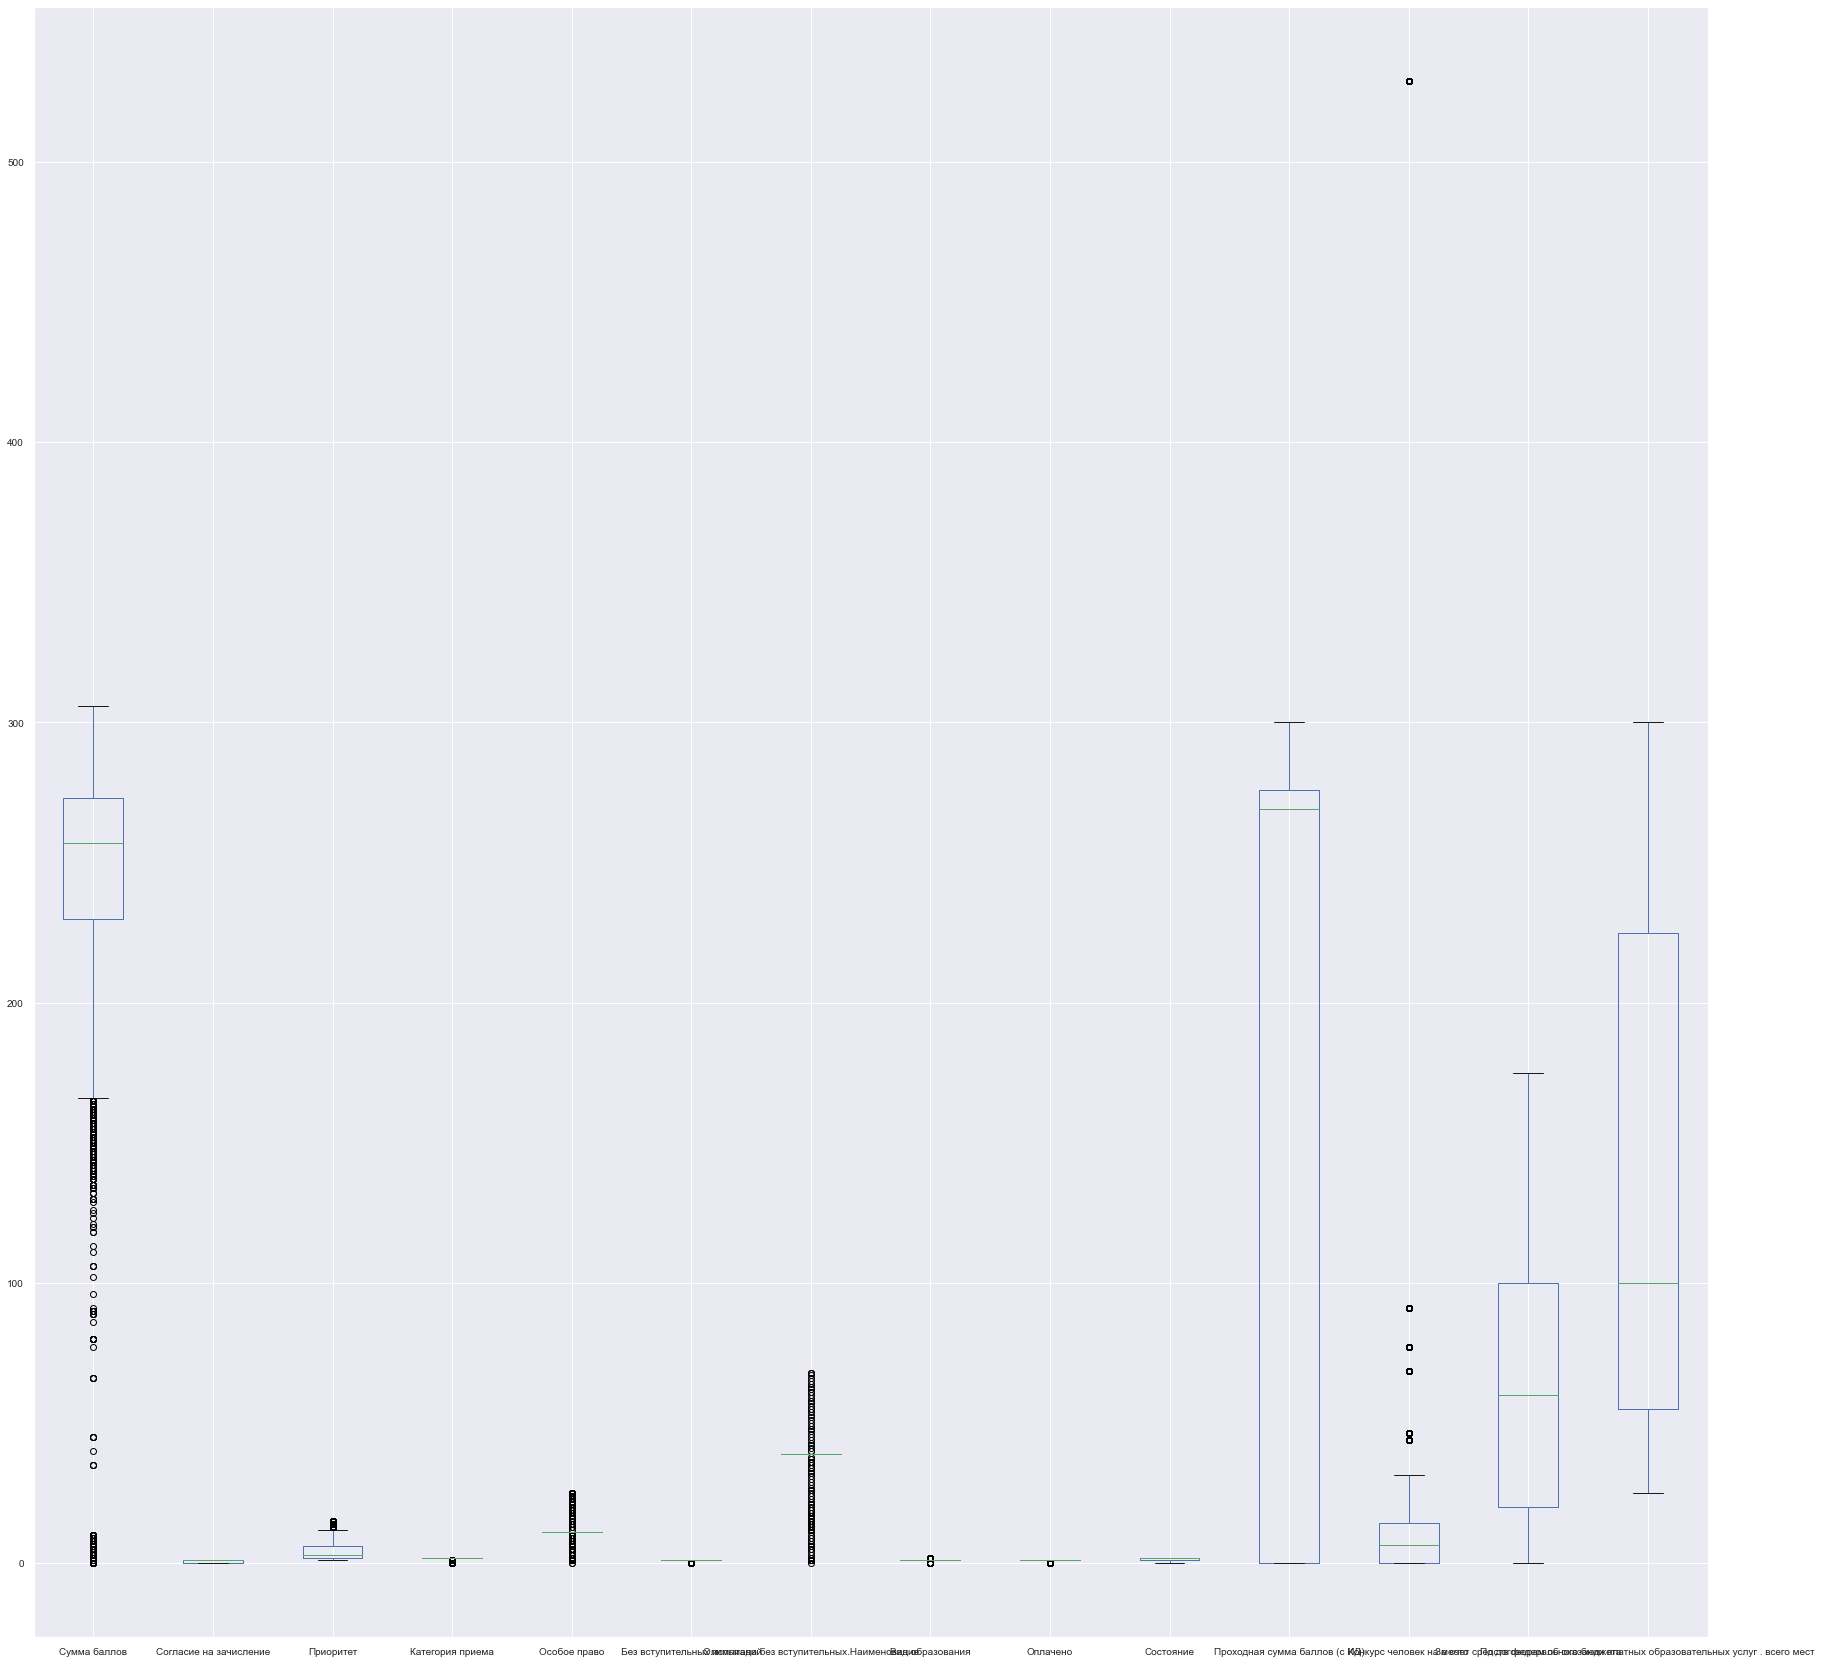

In [19]:
# аномальные значения
ax = df1.plot(kind='box',figsize=(30,30),legend=True, fontsize=10)
plt.show()

# Анализ непрерывных параметров

In [377]:
col = ['Сумма баллов','Проходная сумма баллов (с ИД)', 'Конкурс человек на место', 
       'За счет средств федерального бюджета','По договорам об оказании платных образовательных услуг . всего мест']

In [378]:
df_col=df1[['Состояние','Сумма баллов','Проходная сумма баллов (с ИД)', 'Конкурс человек на место',
            'За счет средств федерального бюджета','По договорам об оказании платных образовательных услуг . всего мест']]
df_col

,Состояние,Сумма баллов,Проходная сумма баллов (с ИД),Конкурс человек на место,За счет средств федерального бюджета,По договорам об оказании платных образовательных услуг . всего мест
0,2.0,232,295.0,68.600000,44,256
1,2.0,232,272.0,7.212766,85,165
2,2.0,232,270.0,7.636364,20,55
3,2.0,232,279.0,7.625000,85,190
4,2.0,232,243.0,4.023810,100,100
...,...,...,...,...,...,...
17512,1.0,252,276.0,19.181818,58,142
17513,1.0,251,279.0,91.000000,10,90
17514,2.0,188,0.0,0.000000,50,175
17515,2.0,188,0.0,0.000000,25,50


Построим гистограмму 

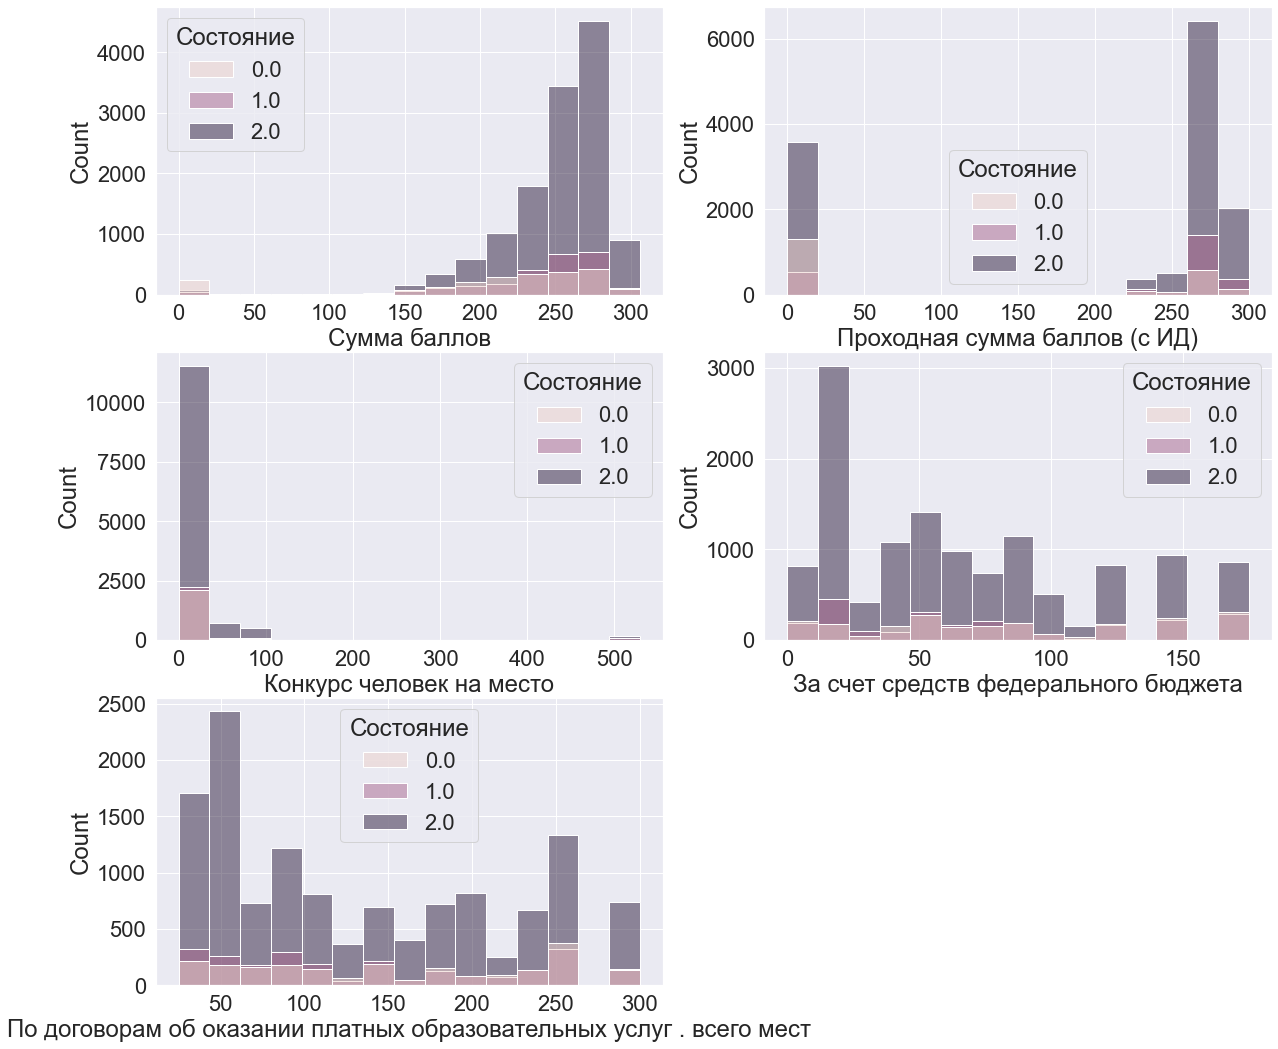

In [351]:
plt.figure(figsize = (20, 18))
for i in range(0, len(col)+1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df1, x=col[i-1], hue="Состояние",bins=15)

Построим ящик с усами

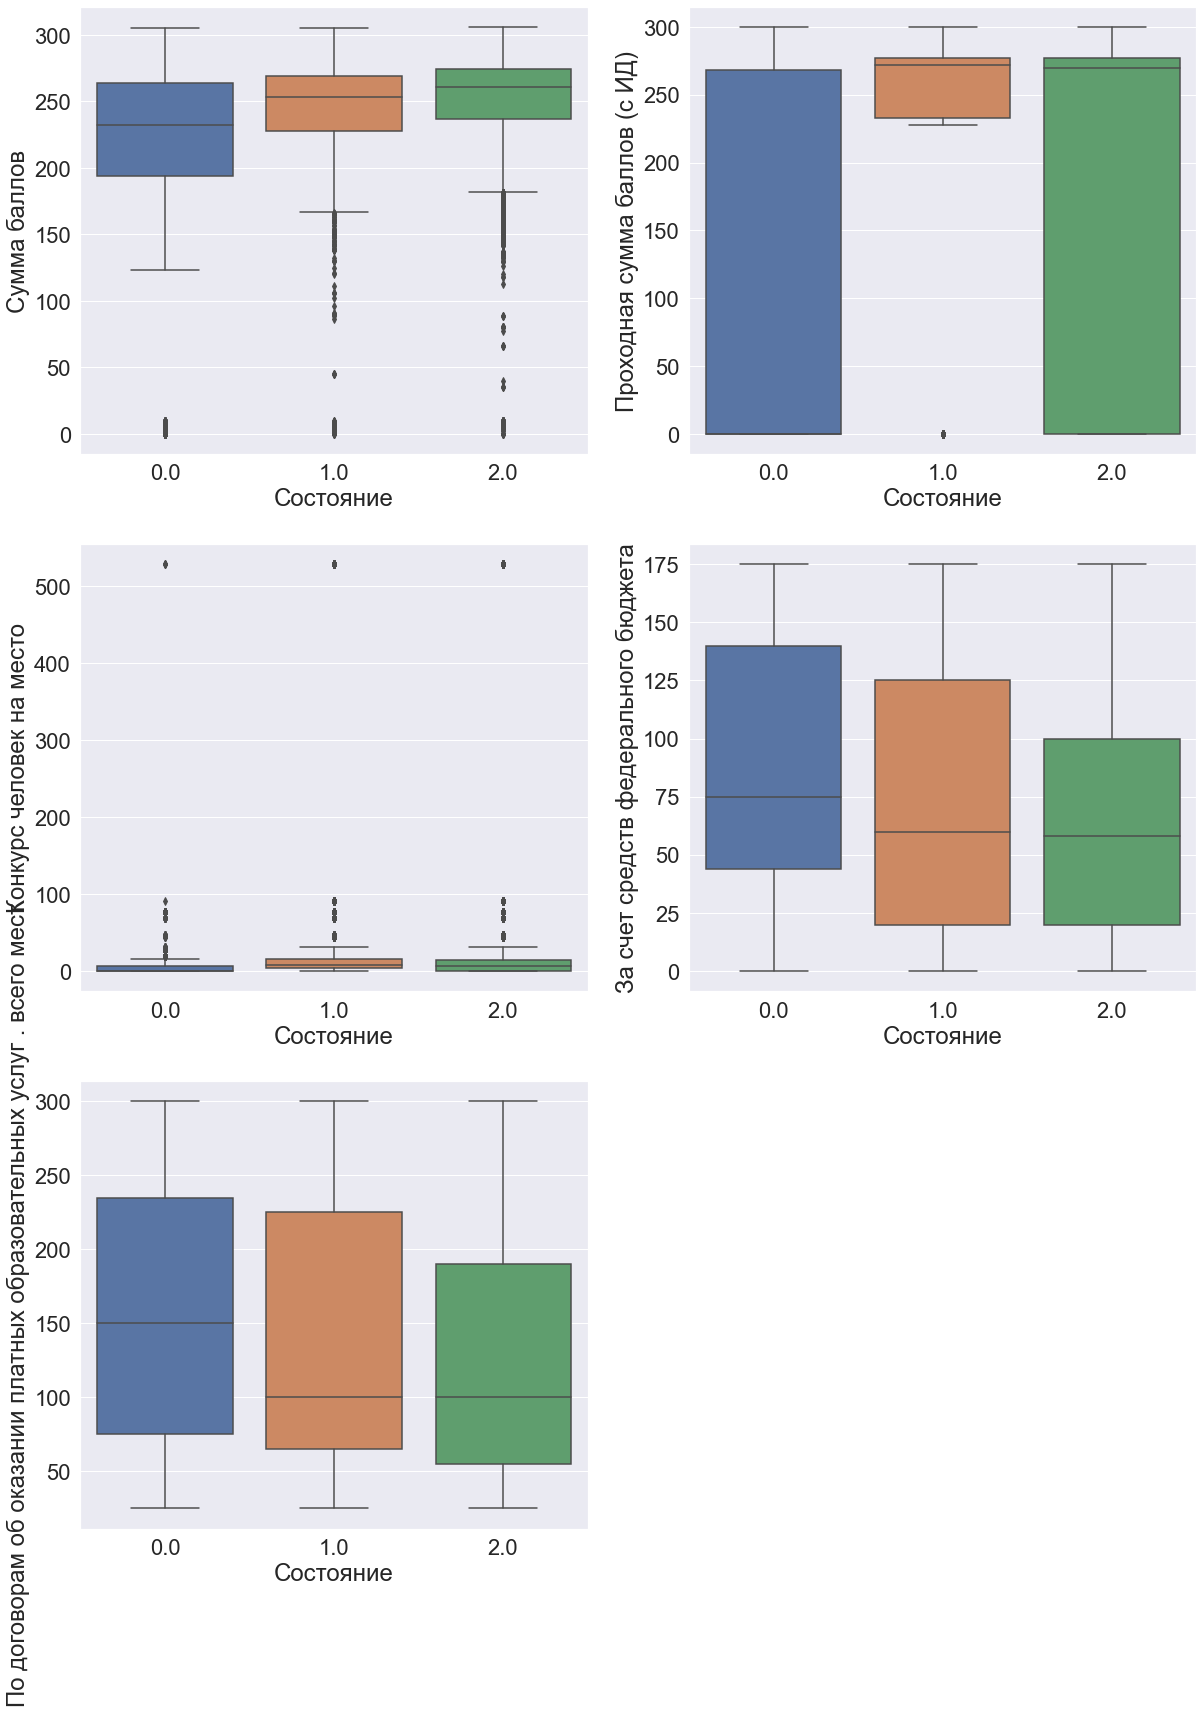

In [353]:
plt.figure(figsize = (20, 28))
for i in range(1, len(col)+1):
    plt.subplot(3, 2, i)
    sns.boxplot(x = 'Состояние', y = col[i-1], data = df)

In [354]:
df1.describe()

,Сумма баллов,Согласие на зачисление,Приоритет,Основание поступления,Категория приема,Особое право,Без вступительных испытаний,Олимпиада без вступительных.Наименование,Вид образования,Оплачено,Состояние,Проходная сумма баллов (с ИД),Конкурс человек на место,За счет средств федерального бюджета,По договорам об оказании платных образовательных услуг . всего мест
count,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000,17517.000000
mean,244.251470,0.738311,4.452589,0.332877,1.963864,11.082834,0.990409,38.876120,1.011417,0.926928,1.612833,188.150083,19.136657,70.396586,134.523777
std,47.805323,0.439567,3.434025,0.495123,0.228447,1.954886,0.097464,2.197322,0.114020,0.260262,0.695803,126.598525,62.282756,51.363508,85.332191
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,230.000000,0.000000,2.000000,0.000000,2.000000,11.000000,1.000000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,55.000000
50%,257.000000,1.000000,3.000000,0.000000,2.000000,11.000000,1.000000,39.000000,1.000000,1.000000,2.000000,269.000000,6.529412,60.000000,100.000000
75%,273.000000,1.000000,6.000000,1.000000,2.000000,11.000000,1.000000,39.000000,1.000000,1.000000,2.000000,276.000000,14.197183,100.000000,225.000000
max,306.000000,1.000000,15.000000,2.000000,2.000000,25.000000,1.000000,68.000000,2.000000,1.000000,2.000000,300.000000,529.000000,175.000000,300.000000


# Анализ категориальных признаков

In [20]:
data_categ = df1
data_categ = data_categ.drop(['Сумма баллов','Проходная сумма баллов (с ИД)', 'Конкурс человек на место', 
                              'За счет средств федерального бюджета',
                              'По договорам об оказании платных образовательных услуг . всего мест',
                              'Олимпиада без вступительных.Наименование'], axis = 1)
data_categ['Состояние'] = df1['Состояние']

In [21]:
col = data_categ.columns[:-1]

<AxesSubplot:xlabel='Согласие\xa0на\xa0зачисление', ylabel='count'>

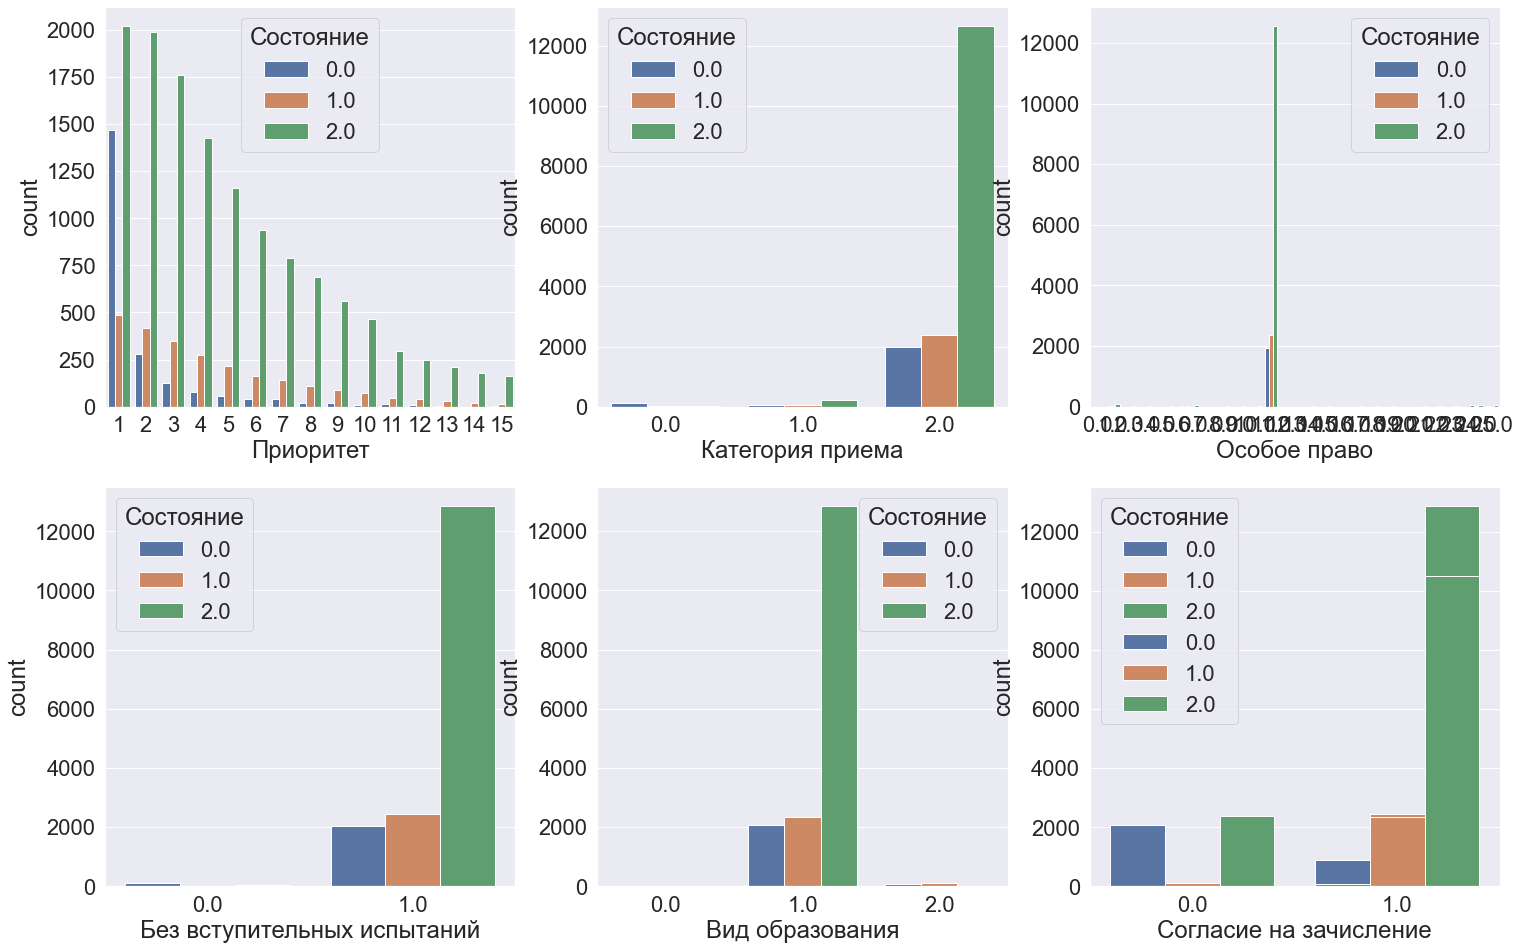

In [22]:
plt.figure(figsize = (25, 25))
for i in range(1, len(col)):
    plt.subplot(3, 3, i)
    sns.countplot(x = data_categ[col[i]], hue = data_categ['Состояние'])
sns.countplot(x = data_categ['Согласие на зачисление'], hue = data_categ['Состояние'])

# Выделим целевую переменную

In [23]:
X = df1.drop('Состояние', axis = 1).values
y = df1['Состояние'].values

Понижение размерности до 2-х компонент 

Цели понижения размерности признакового пространства:

Во-первых, вследствие того, что признаков настолько много, что вычисления происходят значительно дольше требуемого времени. В этой ситуации, признаков на основании которых может быть дана рекомендация очень много и требуется уменьшить размерность, чтобы уменьшить время расчетов, сохранив при этом как можно больше объясняющей информации.

Во-вторых, вследствие того, что вычисления с использованием большого количества данных становятся слишком энергозатратными и экономически не выгодными.

В-третьих, как известно, шум является одним из источников переобучения моделей машинного обучения. С помощью метода главных компонент можно убрать шум. Предполагается, что дисперсия шума мала относительно дисперсии самих данных, и после преобразования данных методом главных компонент, преобразованные данные (компоненты), дисперсии которых окажутся малы, мы будем считать шумом. Их можно смело исключить из последующего обучения, предполагая, что качество модели обучения, как минимум, не понизится.

Казалось бы, самое простое и очевидное решение — убрать по какому-либо заданному параметру неугодные признаки.Но ведь, удалив из расчетов какой-то признак, мы рискуем потерять часть важной информации. Отсюда возникла идея, а почему бы не преобразовать признаки таким образом, чтобы можно было, скажем из числа исходных признаков $D$, получить такое количество $d$ признаков, в которых содержалось бы как можно больше информации исходных признаков, затем на новых, то есть преобразованных данных, провести обучение моделей. 

Одним из способов такого преобразования и является метод главных компонент.

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma = 0.4)
X2D= pca.fit_transform(X)

In [26]:
col = []
for i in y:
    if i == 0:
        col.append('blue')
    if i == 1:
        col.append('red')
    if i == 2:
        col.append('green')

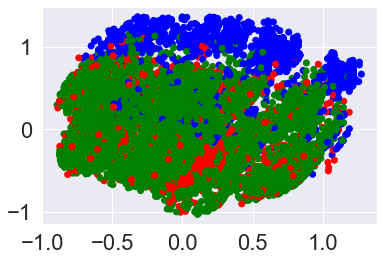

In [27]:
plt.scatter(x = X2D[:,0], y = X2D[:,1], c = col)

# Основная часть работы: использование моделей машинного обучения для прогнозирования оттока абитуриентов в рамках приемной кампании Финансового университета

# Разобьем данные на обучающую и тестовую выборки

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
data = pd.DataFrame(columns = ['Модель','roc-auc','accuracy','precision','recall','f1','cross valid','time'])

In [30]:
f_score = make_scorer(f1_score)

# Обучение моделей

Для достижения цели проекта рассмотрим разработку трех моделей с использованием следующих алгоритмов:

1)	Логистическая регрессия (Logistic Regression)

2)	Дерево решений (Decision Tree Classifier)

3)	Случайный лес (Random Forest Classifier)

4)	Метод k-ближайших соседей (KNN)

5)	Метод опорных векторов с ядром linear (SVM – linear)

6)	Метод опорных векторов с ядром poly (SVM – poly)

7)	Метод опорных векторов с ядром rbf (SVM – rbf)

8)	Метод опорных векторов с ядром sigmoid (SVM – sigmoid)

9)	Наивный байессовский метод (GaussianNB)

10)	Градиентный бустинг (GradientBoostingClassifier)


В качестве целевых метрик будем рассматривать `accuracy`:
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN},$$ где:

* TP - истинно тариф Ультра
* TN - истинно тариф Смарт
* FP - ложно тариф Ультра
* FN - ложно тариф Смарт

Также будем учитывать значения `roc-auc`, `f1`, `recall`,`precision` и `cross valid`, которые вычисляются следующим образом:
 $$Precision = \frac{TP}{TP+FP},$$    
 $$Recall=  \frac{TP}{TP+FN},$$
 $$F1=\frac{2PR}{P+R}.$$

# Логистическая регрессия

In [31]:
s = time.time()
clf = LogisticRegression().fit(X_train, y_train)
time_learn = time.time() - s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8429315635481339


In [32]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8327397306003578
accuracy: 0.843892694063927
precision: 0.8405102294584542
recall: 0.6359159276969594
f1: 0.6333442302747271


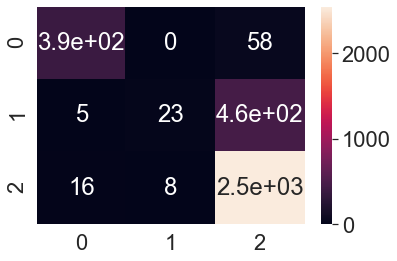

In [33]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [34]:
cv_results = cross_validate(clf, X, y, cv=5, scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6392836998445175


In [35]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.87      0.91       446
     class 1       0.74      0.05      0.09       488
     class 2       0.83      0.99      0.90      2570

    accuracy                           0.84      3504
   macro avg       0.84      0.64      0.63      3504
weighted avg       0.83      0.84      0.79      3504



In [36]:
a = {'Модель':'LogisticRegression',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [37]:
data

,Модель,roc-auc,accuracy,precision,recall,f1,cross valid,time
0,LogisticRegression,0.83274,0.843893,0.84051,0.635916,0.633344,0.639284,0.272466


# DecisionTreeClassifier

In [38]:
s = time.time()
clf = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8443588096767287


In [39]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8049646680258217
accuracy: 0.8418949771689498
precision: 0.8603795966785291
recall: 0.6251894204309284
f1: 0.6285507630532249


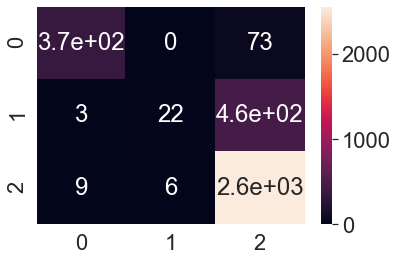

In [40]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [41]:
cv_results = cross_validate(clf, X, y, cv=5, scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6222052309074403


In [42]:
a = {'Модель':'DecisionTreeClassifier',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [43]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.84      0.90       446
     class 1       0.79      0.05      0.09       488
     class 2       0.83      0.99      0.90      2570

    accuracy                           0.84      3504
   macro avg       0.86      0.63      0.63      3504
weighted avg       0.84      0.84      0.79      3504



# RandomForestClassifier

In [44]:
s = time.time()
clf = RandomForestClassifier(max_depth = 5).fit(X_train, y_train)
time_learn = time.time() - s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8342967244701349


In [45]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8371058003920774
accuracy: 0.8347602739726028
precision: 0.9002195209245304
recall: 0.5994142471433545
f1: 0.6094617447990545


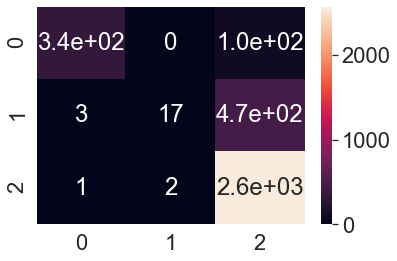

In [46]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [47]:
cv_results = cross_validate(clf, X, y, cv=5, scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5917088125014078


In [48]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.76      0.86       446
     class 1       0.89      0.03      0.07       488
     class 2       0.82      1.00      0.90      2570

    accuracy                           0.83      3504
   macro avg       0.90      0.60      0.61      3504
weighted avg       0.85      0.83      0.78      3504



In [49]:
a = {'Модель':'RandomForestClassifier',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# KNN

In [50]:
s = time.time()
clf = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8901020480981945


In [51]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.7973295204895946
accuracy: 0.807648401826484
precision: 0.6843942971836663
recall: 0.6758343986072348
f1: 0.6751062627063473


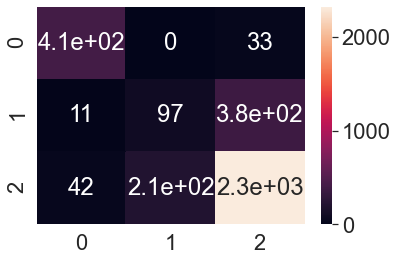

In [52]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [53]:
cv_results = cross_validate(clf, X, y, cv=5,scoring= 'recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6605001546847965


In [54]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.93      0.91       446
     class 1       0.32      0.20      0.24       488
     class 2       0.85      0.90      0.87      2570

    accuracy                           0.81      3504
   macro avg       0.68      0.68      0.68      3504
weighted avg       0.78      0.81      0.79      3504



In [55]:
a = {'Модель':'KNN',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# SVM, kernel = 'rbf'

In [56]:
s = time.time()
clf = SVC(probability = True, kernel = 'rbf').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8494968957396704


In [57]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8060140169511616
accuracy: 0.8441780821917808
precision: 0.8609599115779772
recall: 0.6412443853224183
f1: 0.629456506285909


In [58]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      0.90      0.91       446
     class 1       0.83      0.04      0.07       488
     class 2       0.83      0.99      0.90      2570

    accuracy                           0.84      3504
   macro avg       0.86      0.64      0.63      3504
weighted avg       0.84      0.84      0.79      3504



In [59]:
cv_results = cross_validate(clf, X, y, cv=5, scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6439796114726485


In [60]:
a = {'Модель':'SVM-rbf',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [61]:
data

,Модель,roc-auc,accuracy,precision,recall,f1,cross valid,time
0,LogisticRegression,0.832740,0.843893,0.840510,0.635916,0.633344,0.639284,0.272466
1,DecisionTreeClassifier,0.804965,0.841895,0.860380,0.625189,0.628551,0.622205,0.032925
2,RandomForestClassifier,0.837106,0.834760,0.900220,0.599414,0.609462,0.591709,0.467880
3,KNN,0.797330,0.807648,0.684394,0.675834,0.675106,0.660500,0.303247
4,SVM-rbf,0.806014,0.844178,0.860960,0.641244,0.629457,0.643980,40.098859


# SVM, kernel = 'poly'

In [62]:
s = time.time()
clf = SVC(probability = True, kernel = 'poly').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8483550988367944


In [63]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.7962939746439228
accuracy: 0.8444634703196348
precision: 0.8737325837569337
recall: 0.6338332492841998
f1: 0.6308193540711455


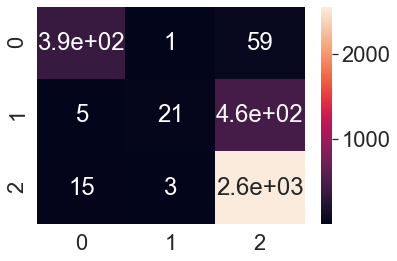

In [64]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [65]:
cv_results = cross_validate(clf, X, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6260910480486649


In [66]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.87      0.91       446
     class 1       0.84      0.04      0.08       488
     class 2       0.83      0.99      0.90      2570

    accuracy                           0.84      3504
   macro avg       0.87      0.63      0.63      3504
weighted avg       0.85      0.84      0.79      3504



In [67]:
a = {'Модель':'SVM-poly',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# SVM, kernel = 'sigmoid'

In [68]:
s = time.time()
clf = SVC(probability = True, kernel = 'sigmoid').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.7170484550060658


In [69]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.730683954077645
accuracy: 0.7174657534246576
precision: 0.5572392704120613
recall: 0.555978281856457
f1: 0.5559778258962833


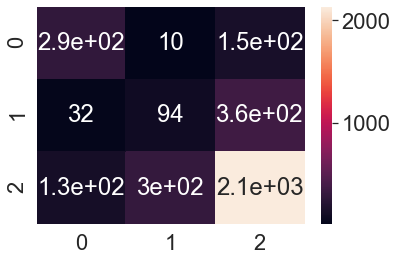

In [70]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [71]:
cv_results = cross_validate(clf, X, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5407085826403792


In [72]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.63      0.65      0.64       446
     class 1       0.23      0.19      0.21       488
     class 2       0.81      0.83      0.82      2570

    accuracy                           0.72      3504
   macro avg       0.56      0.56      0.56      3504
weighted avg       0.70      0.72      0.71      3504



In [73]:
a = {'Модель':'SVM-sigmoid',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [74]:
data

,Модель,roc-auc,accuracy,precision,recall,f1,cross valid,time
0,LogisticRegression,0.832740,0.843893,0.840510,0.635916,0.633344,0.639284,0.272466
1,DecisionTreeClassifier,0.804965,0.841895,0.860380,0.625189,0.628551,0.622205,0.032925
2,RandomForestClassifier,0.837106,0.834760,0.900220,0.599414,0.609462,0.591709,0.467880
3,KNN,0.797330,0.807648,0.684394,0.675834,0.675106,0.660500,0.303247
4,SVM-rbf,0.806014,0.844178,0.860960,0.641244,0.629457,0.643980,40.098859
5,SVM-poly,0.796294,0.844463,0.873733,0.633833,0.630819,0.626091,76.507980
6,SVM-sigmoid,0.730684,0.717466,0.557239,0.555978,0.555978,0.540709,29.066487


# SVM, kernel = 'linear' - нет

In [192]:
s = time.time()
clf = SVC(probability = True, kernel = 'linear').fit(X_train, y_train)
time_learn = time.time() - s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8433597373867123


In [193]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.7956646891512413
accuracy: 0.8430365296803652
precision: 0.8845358917536431
recall: 0.630482272783918
f1: 0.6221864331820856


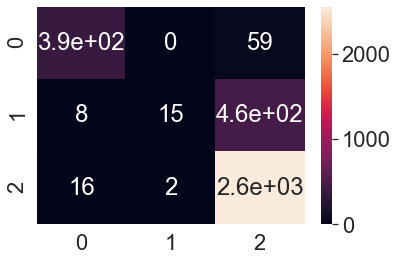

In [194]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [195]:
cv_results = cross_validate(clf, X, y, cv=5, scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6401737840826113


In [196]:
a = {'Модель':'SVM-linear',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [197]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.87      0.90       446
     class 1       0.88      0.03      0.06       488
     class 2       0.83      0.99      0.90      2570

    accuracy                           0.84      3504
   macro avg       0.88      0.63      0.62      3504
weighted avg       0.85      0.84      0.79      3504



# GradientBoostingClassifier

In [75]:
s = time.time()
clf = GradientBoostingClassifier(max_depth = 3).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8560622279312068


In [76]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8676592775196902
accuracy: 0.853310502283105
precision: 0.8735980555671863
recall: 0.6565906558340063
f1: 0.6592546523663366


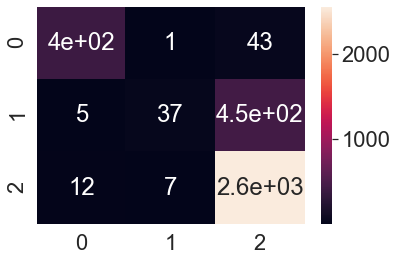

In [77]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [78]:
cv_results = cross_validate(clf, X, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6491503070175392


In [79]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.90      0.93       446
     class 1       0.82      0.08      0.14       488
     class 2       0.84      0.99      0.91      2570

    accuracy                           0.85      3504
   macro avg       0.87      0.66      0.66      3504
weighted avg       0.85      0.85      0.80      3504



In [80]:
a = {'Модель':'GradientBoostingClassifier',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# GaussianNB

In [81]:
s = time.time()
clf = GaussianNB().fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8142439163633769


In [82]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.7906595134491342
accuracy: 0.8113584474885844
precision: 0.6738395680948491
recall: 0.6052763714763844
f1: 0.614695496302931


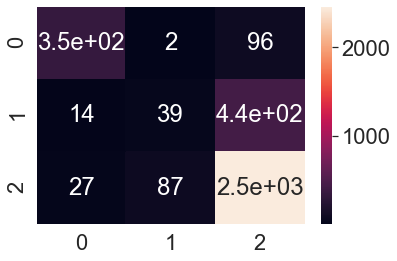

In [83]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [84]:
cv_results = cross_validate(clf, X, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6005355942825334


In [85]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.78      0.83       446
     class 1       0.30      0.08      0.13       488
     class 2       0.82      0.96      0.88      2570

    accuracy                           0.81      3504
   macro avg       0.67      0.61      0.61      3504
weighted avg       0.76      0.81      0.77      3504



In [86]:
a = {'Модель':'GaussianNB',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [87]:
data

,Модель,roc-auc,accuracy,precision,recall,f1,cross valid,time
0,LogisticRegression,0.832740,0.843893,0.840510,0.635916,0.633344,0.639284,0.272466
1,DecisionTreeClassifier,0.804965,0.841895,0.860380,0.625189,0.628551,0.622205,0.032925
2,RandomForestClassifier,0.837106,0.834760,0.900220,0.599414,0.609462,0.591709,0.467880
3,KNN,0.797330,0.807648,0.684394,0.675834,0.675106,0.660500,0.303247
4,SVM-rbf,0.806014,0.844178,0.860960,0.641244,0.629457,0.643980,40.098859
5,SVM-poly,0.796294,0.844463,0.873733,0.633833,0.630819,0.626091,76.507980
6,SVM-sigmoid,0.730684,0.717466,0.557239,0.555978,0.555978,0.540709,29.066487
7,GradientBoostingClassifier,0.867659,0.853311,0.873598,0.656591,0.659255,0.649150,3.662103
8,GaussianNB,0.790660,0.811358,0.673840,0.605276,0.614695,0.600536,0.010006


## Попробуем улучшить данные модели с помощью поиска гиперпараметров GridSearch

# LogisticRegression

In [88]:
f1 = f_score

In [89]:
clf = LogisticRegression()

parameters = {'C':[0.001, 0.01, 0.1, 1, 10], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

clf_search = GridSearchCV(clf, parameters, scoring = f1)
clf_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring=make_scorer(f1_score))

In [90]:
clf_search.best_params_

{'C': 0.001, 'solver': 'newton-cg'}

In [91]:
s = time.time()
clf = LogisticRegression(C = 0.001, solver = 'newton-cg').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8301577106972098


In [92]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8209808329478184
accuracy: 0.831906392694064
precision: 0.8856268437457661
recall: 0.5954535282663005
f1: 0.607113937329803


In [93]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.75      0.85       446
     class 1       0.87      0.04      0.08       488
     class 2       0.82      1.00      0.90      2570

    accuracy                           0.83      3504
   macro avg       0.89      0.60      0.61      3504
weighted avg       0.84      0.83      0.78      3504



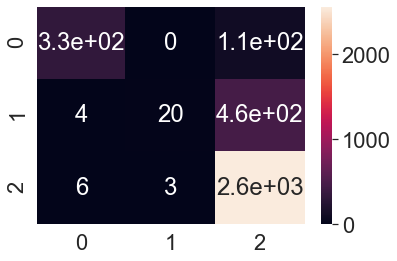

In [94]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [95]:
cv_results = cross_validate(clf, X, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5859067008757809


In [96]:
a = {'Модель':'LogisticRegression-GS',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# RandomForestClassifier

In [97]:
clf = RandomForestClassifier()

parameters = {'criterion':['gini','entropy','log_loss'],
              'max_depth': [2, 3, 4, 5, 6]}

clf_search = GridSearchCV(clf, parameters, scoring = f1)
clf_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6]},
             scoring=make_scorer(f1_score))

In [98]:
clf_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [99]:
s = time.time()
clf = RandomForestClassifier(criterion = 'gini', max_depth = 2).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8138157425247984


In [100]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8062290934633974
accuracy: 0.8156392694063926
precision: 0.5986392361354019
recall: 0.5485799701046338
f1: 0.5573927410203493


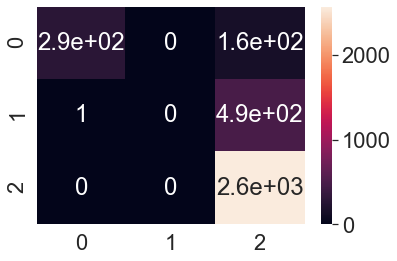

In [101]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [102]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.65      0.78       446
     class 1       0.00      0.00      0.00       488
     class 2       0.80      1.00      0.89      2570

    accuracy                           0.82      3504
   macro avg       0.60      0.55      0.56      3504
weighted avg       0.71      0.82      0.75      3504



In [103]:
cv_results = cross_validate(clf, X, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5343608331194937


In [104]:
a = {'Модель':'RandomForestClassifier-GS',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# GaussianNB

In [105]:
clf = GaussianNB()

parameters = {'var_smoothing':[10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,10,100]}

clf_search = GridSearchCV(clf, parameters,scoring = f1)
clf_search.fit(X_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1, 10,
                                           100]},
             scoring=make_scorer(f1_score))

In [106]:
clf_search.best_params_

{'var_smoothing': 1e-09}

In [107]:
s = time.time()
clf = GaussianNB(var_smoothing = 1e-09).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8142439163633769


In [108]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.7906595134491342
accuracy: 0.8113584474885844
precision: 0.6738395680948491
recall: 0.6052763714763844
f1: 0.614695496302931


In [109]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.78      0.83       446
     class 1       0.30      0.08      0.13       488
     class 2       0.82      0.96      0.88      2570

    accuracy                           0.81      3504
   macro avg       0.67      0.61      0.61      3504
weighted avg       0.76      0.81      0.77      3504



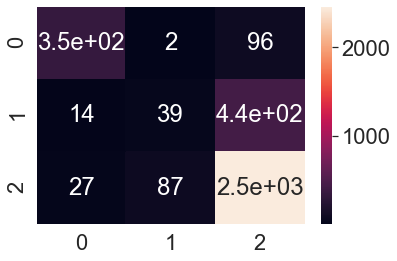

In [110]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [111]:
cv_results = cross_validate(clf, X, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6005355942825334


In [112]:
a = {'Модель':'GaussianNB-GS',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# Введение сурогатных признаков

In [113]:
pca = KernelPCA(n_components = 5, kernel="sigmoid", gamma = 0.03)
X2D= pca.fit_transform(X)
X_new = np.hstack([X, X2D])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# LogisticRegression

In [115]:
s = time.time()
clf = LogisticRegression(C = 0.001, solver = 'newton-cg').fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8301577106972098


In [116]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8210030907404243
accuracy: 0.831906392694064
precision: 0.8856268437457661
recall: 0.5954535282663005
f1: 0.607113937329803


In [117]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.75      0.85       446
     class 1       0.87      0.04      0.08       488
     class 2       0.82      1.00      0.90      2570

    accuracy                           0.83      3504
   macro avg       0.89      0.60      0.61      3504
weighted avg       0.84      0.83      0.78      3504



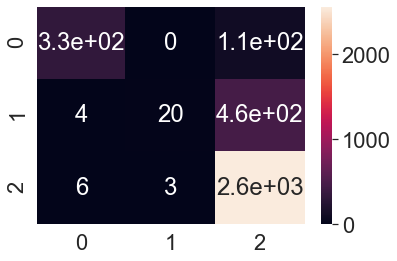

In [118]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [119]:
cv_results = cross_validate(clf, X_new, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5859067008757809


In [120]:
a = {'Модель':'LogisticRegression-PCA',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# RandomForestClassifier

In [121]:
s = time.time()
clf = RandomForestClassifier(criterion = 'gini', max_depth = 2).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8194533647327482


In [122]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.7963704300759925
accuracy: 0.8233447488584474
precision: 0.5990733831582356
recall: 0.5687593423019432
f1: 0.5725295222710166


In [123]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.71      0.82       446
     class 1       0.00      0.00      0.00       488
     class 2       0.81      1.00      0.89      2570

    accuracy                           0.82      3504
   macro avg       0.60      0.57      0.57      3504
weighted avg       0.72      0.82      0.76      3504



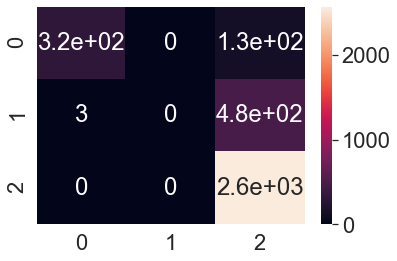

In [124]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [125]:
cv_results = cross_validate(clf, X_new, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5423593182654198


In [126]:
a = {'Модель':'RandomForestClassifier-PCA',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# GaussianNB

In [127]:
s = time.time()
clf = GaussianNB(var_smoothing = 1e-09).fit(X_train, y_train)
time_learn = time.time()-s
print('Точность на тренировочной выборке:', clf.score(X_train, y_train))

Точность на тренировочной выборке: 0.8141725540569471


In [128]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.7911106869836969
accuracy: 0.8110730593607306
precision: 0.6712499842003282
recall: 0.6045933113670947
f1: 0.6133477663645006


In [129]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.78      0.83       446
     class 1       0.30      0.08      0.12       488
     class 2       0.82      0.96      0.88      2570

    accuracy                           0.81      3504
   macro avg       0.67      0.60      0.61      3504
weighted avg       0.76      0.81      0.77      3504



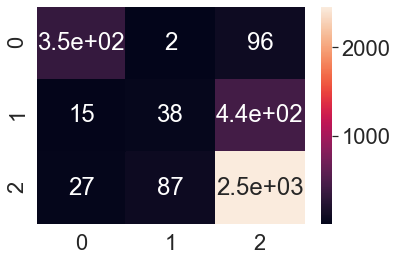

In [130]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [131]:
cv_results = cross_validate(clf, X_new, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6017096691638539


In [132]:
a = {'Модель':'GaussianNB-PCA',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# Ансамблирование моделей

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
kfold = model_selection.KFold(n_splits=5)
cart = GaussianNB(var_smoothing = 1e-09)
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring='recall_macro')

In [135]:
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5818735515531426


In [136]:
s = time.time()
clf = model.fit(X_train, y_train)
time_learn = time.time() - s

In [137]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.790859479560608
accuracy: 0.8113584474885844
precision: 0.6738395680948491
recall: 0.6052763714763844
f1: 0.614695496302931


In [138]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.78      0.83       446
     class 1       0.30      0.08      0.13       488
     class 2       0.82      0.96      0.88      2570

    accuracy                           0.81      3504
   macro avg       0.67      0.61      0.61      3504
weighted avg       0.76      0.81      0.77      3504



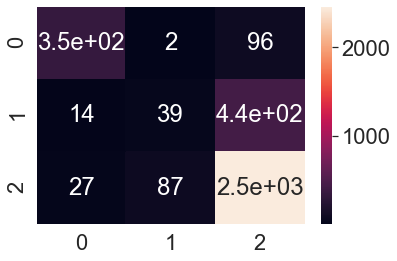

In [139]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [140]:
cv_results = cross_validate(clf, X_new, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.6017676210811009


In [141]:
a = {'Модель':'Bagging GaussianNB',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

# NO

In [180]:
kfold = model_selection.KFold(n_splits=5)
cart = LogisticRegression(C = 0.001, solver = 'newton-cg')
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X, y, cv=kfold,scoring='recall_macro')

In [181]:
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5669696085153748


In [182]:
s = time.time()
clf = model.fit(X_train, y_train)
time_learn = time.time() - s

In [183]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8209155256305057
accuracy: 0.83162100456621
precision: 0.8827124623177346
recall: 0.5947704681570108
f1: 0.605501580424


In [185]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.75      0.84       446
     class 1       0.86      0.04      0.07       488
     class 2       0.82      1.00      0.90      2570

    accuracy                           0.83      3504
   macro avg       0.88      0.59      0.61      3504
weighted avg       0.84      0.83      0.78      3504



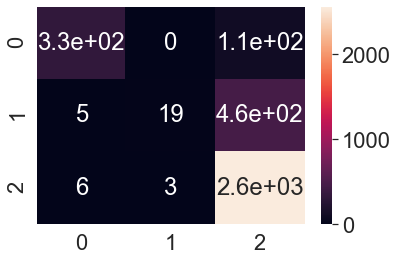

In [186]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [187]:
cv_results = cross_validate(clf, X_new, y, cv=5,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',cv_results['test_score'].mean())

Средняя точность на тесте при кросс-валидации: 0.5859325506883699


In [188]:
a = {'Модель':'Bagging LogisticRegression',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [143]:
kfold = model_selection.KFold(n_splits=5)
cart = GaussianNB(var_smoothing = 1e-09)
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X_new, y, cv=kfold,scoring='recall_macro')

In [144]:
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5822730844561415


In [145]:
s = time.time()
clf = model.fit(X_train, y_train)
time_learn = time.time() - s

In [146]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.7910703678972837
accuracy: 0.8110730593607306
precision: 0.6712499842003282
recall: 0.6045933113670947
f1: 0.6133477663645006


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83       446
         1.0       0.30      0.08      0.12       488
         2.0       0.82      0.96      0.88      2570

    accuracy                           0.81      3504
   macro avg       0.67      0.60      0.61      3504
weighted avg       0.76      0.81      0.77      3504



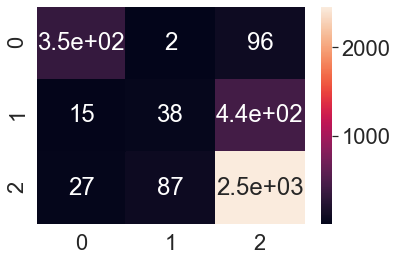

In [148]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [149]:
a = {'Модель':'Bagging GaussianNB PCA',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [150]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.78      0.83       446
     class 1       0.30      0.08      0.12       488
     class 2       0.82      0.96      0.88      2570

    accuracy                           0.81      3504
   macro avg       0.67      0.60      0.61      3504
weighted avg       0.76      0.81      0.77      3504



In [151]:
kfold = model_selection.KFold(n_splits=5)
cart = LogisticRegression(C = 0.001, solver = 'newton-cg')
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X_new, y, cv=kfold,scoring='recall_macro')

In [152]:
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5672733438322968


In [153]:
s = time.time()
clf = model.fit(X_train, y_train)
time_learn = time.time() - s

In [154]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8210594661066396
accuracy: 0.831906392694064
precision: 0.8856268437457661
recall: 0.5954535282663005
f1: 0.607113937329803


In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85       446
         1.0       0.87      0.04      0.08       488
         2.0       0.82      1.00      0.90      2570

    accuracy                           0.83      3504
   macro avg       0.89      0.60      0.61      3504
weighted avg       0.84      0.83      0.78      3504



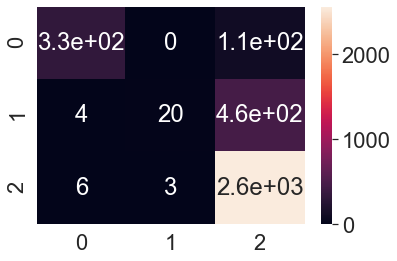

In [156]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [157]:
a = {'Модель':'Bagging LogisticRegression PCA',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [158]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.75      0.85       446
     class 1       0.87      0.04      0.08       488
     class 2       0.82      1.00      0.90      2570

    accuracy                           0.83      3504
   macro avg       0.89      0.60      0.61      3504
weighted avg       0.84      0.83      0.78      3504



# Голосующий ансамбль

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
kfold = model_selection.KFold(n_splits=5)
estimators = []
model1 = GaussianNB(var_smoothing = 1e-09)
estimators.append(('GaussianNB', model1))
model2 = LogisticRegression(C = 0.001, solver = 'newton-cg')
estimators.append(('LogisticRegression', model2))
model3 = RandomForestClassifier(criterion = 'gini', max_depth = 2)
estimators.append(('RandomForestClassifier', model3))
ensemble = VotingClassifier(estimators, voting = 'soft')
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold,scoring='recall_macro')
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5778105630722077


In [161]:
s = time.time()
clf = ensemble.fit(X_train, y_train)
time_learn = time.time() - s

In [162]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.8152634217731672
accuracy: 0.8290525114155252
precision: 0.7825909343388399
recall: 0.6033574243989248
f1: 0.6055379365522958


In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       446
         1.0       0.62      0.04      0.08       488
         2.0       0.82      0.99      0.90      2570

    accuracy                           0.83      3504
   macro avg       0.78      0.60      0.61      3504
weighted avg       0.80      0.83      0.78      3504



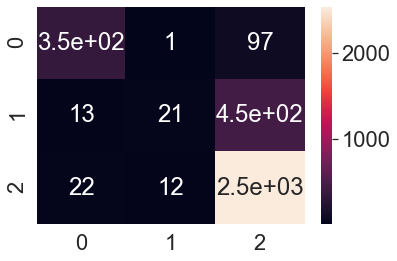

In [164]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [165]:
a = {'Модель':'VotingClassifier-3',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [166]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.91      0.78      0.84       446
     class 1       0.62      0.04      0.08       488
     class 2       0.82      0.99      0.90      2570

    accuracy                           0.83      3504
   macro avg       0.78      0.60      0.61      3504
weighted avg       0.80      0.83      0.78      3504



In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [168]:
kfold = model_selection.KFold(n_splits=5)
estimators = []
model1 = GaussianNB(var_smoothing = 1e-09)
estimators.append(('GaussianNB', model1))
model2 = LogisticRegression(C = 0.001, solver = 'newton-cg')
estimators.append(('LogisticRegression', model2))
ensemble = VotingClassifier(estimators, voting = 'soft')
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold,scoring= 'recall_macro')
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.5808374524929799


In [169]:
s = time.time()
clf = ensemble.fit(X_train, y_train)
time_learn = time.time() - s

In [170]:
y_pred = clf.predict(X_test)
y_pred_pr = clf.predict_proba(X_test)
y_score = y_test
print('roc-auc:',roc_auc_score(y_score, y_pred_pr, multi_class='ovr'))
print('accuracy:', accuracy_score(y_score, y_pred))
print('precision:', precision_score(y_score, y_pred,  average = 'macro'))
print('recall:', recall_score(y_score, y_pred,  average = 'macro'))
print('f1:', f1_score(y_score, y_pred,  average = 'macro'))

roc-auc: 0.818318508696851
accuracy: 0.8113584474885844
precision: 0.6738395680948491
recall: 0.6052763714763844
f1: 0.614695496302931


In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83       446
         1.0       0.30      0.08      0.13       488
         2.0       0.82      0.96      0.88      2570

    accuracy                           0.81      3504
   macro avg       0.67      0.61      0.61      3504
weighted avg       0.76      0.81      0.77      3504



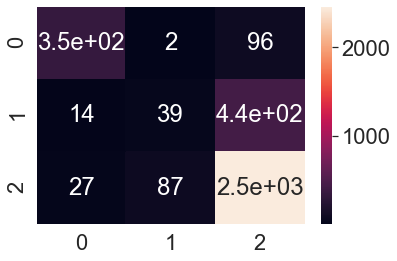

In [172]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True)
plt.show()

In [173]:
a = {'Модель':'VotingClassifie-2-NB-PCA',
     'roc-auc':roc_auc_score(y_score, y_pred_pr, multi_class='ovr'),
     'accuracy':accuracy_score(y_score, y_pred),
     'precision':precision_score(y_score, y_pred,  average = 'macro'),
     'recall':recall_score(y_score, y_pred,  average = 'macro'),
     'f1':f1_score(y_score, y_pred,  average = 'macro'),
     'cross valid':cv_results['test_score'].mean(),
     'time':time_learn}
data = data.append(a, ignore_index = True)

In [174]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_score, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.78      0.83       446
     class 1       0.30      0.08      0.13       488
     class 2       0.82      0.96      0.88      2570

    accuracy                           0.81      3504
   macro avg       0.67      0.61      0.61      3504
weighted avg       0.76      0.81      0.77      3504



In [199]:
data

,Модель,roc-auc,accuracy,precision,recall,f1,cross valid,time
0,LogisticRegression,0.832740,0.843893,0.840510,0.635916,0.633344,0.639284,0.272466
1,DecisionTreeClassifier,0.804965,0.841895,0.860380,0.625189,0.628551,0.622205,0.032925
2,RandomForestClassifier,0.837106,0.834760,0.900220,0.599414,0.609462,0.591709,0.467880
3,KNN,0.797330,0.807648,0.684394,0.675834,0.675106,0.660500,0.303247
4,SVM-rbf,0.806014,0.844178,0.860960,0.641244,0.629457,0.643980,40.098859
5,SVM-poly,0.796294,0.844463,0.873733,0.633833,0.630819,0.626091,76.507980
6,SVM-sigmoid,0.730684,0.717466,0.557239,0.555978,0.555978,0.540709,29.066487
7,GradientBoostingClassifier,0.867659,0.853311,0.873598,0.656591,0.659255,0.649150,3.662103
8,GaussianNB,0.790660,0.811358,0.673840,0.605276,0.614695,0.600536,0.010006
9,LogisticRegression-GS,0.820981,0.831906,0.885627,0.595454,0.607114,0.585907,0.202458


In [200]:
sorted_df = data.sort_values(by='roc-auc', ascending=False)

In [201]:
sorted_df

,Модель,roc-auc,accuracy,precision,recall,f1,cross valid,time
7,GradientBoostingClassifier,0.867659,0.853311,0.873598,0.656591,0.659255,0.649150,3.662103
2,RandomForestClassifier,0.837106,0.834760,0.900220,0.599414,0.609462,0.591709,0.467880
0,LogisticRegression,0.832740,0.843893,0.840510,0.635916,0.633344,0.639284,0.272466
17,Bagging LogisticRegression PCA,0.821059,0.831906,0.885627,0.595454,0.607114,0.601768,26.287905
12,LogisticRegression-PCA,0.821003,0.831906,0.885627,0.595454,0.607114,0.585907,0.350728
9,LogisticRegression-GS,0.820981,0.831906,0.885627,0.595454,0.607114,0.585907,0.202458
20,Bagging LogisticRegression,0.820916,0.831621,0.882712,0.594770,0.605502,0.585933,19.486405
19,VotingClassifie-2-NB-PCA,0.818319,0.811358,0.673840,0.605276,0.614695,0.601768,0.246122
18,VotingClassifier-3,0.815263,0.829053,0.782591,0.603357,0.605538,0.601768,0.508249
10,RandomForestClassifier-GS,0.806229,0.815639,0.598639,0.548580,0.557393,0.534361,0.324180
